Середнє арифметичне значення:  0.1272831644478099
Середнє гармонічне значення:  8.11666722393192
Середнє геометричне значення:  1.4775935386427403
Середнє точне значення:  0.19719454938269526
Середня абсолютна похибка:  0.07595884574105166
Середня відносна похибка:  0.04109708943918544


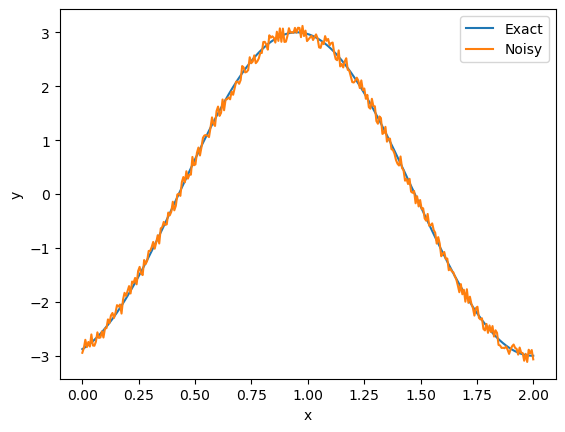

Максимальне значення абсолютної похибки:  0.14899451395564167
Мінімальне значення абсолютної похибки:  0.0003548228216545546
Максимальне значення відносної похибки:  4.707303057613813
Мінімальне значення відносної похибки: 0.00018121441981269298


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import median

def generate_sequence(n, A, phi, x_interval):
    N = n * 100
    x = np.linspace(x_interval[0], x_interval[1], N)
    exact_values = A * np.sin(n * x + phi)
    errors = np.random.uniform(-0.05 * A, 0.05 * A, N)
    noisy_values = exact_values + errors
    return x, noisy_values

def compute_arithmetic_mean(sequence):
    return np.mean(sequence)

def compute_harmonic_mean(sequence):
    return len(sequence) / np.sum(1 / sequence)

def compute_geometric_mean(sequence):
    valid_values = sequence[np.logical_and(sequence > 0, ~np.isnan(sequence))]
    return np.exp(np.mean(np.log(valid_values)))



def plot_graph(x, exact_values, noisy_values):
    plt.plot(x, exact_values, label='Exact')
    plt.plot(x, noisy_values, label='Noisy')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def compute_exact_values(x, A, n, phi):
    return A * np.sin(n * x + phi)

def compare_values(approx_values, exact_values, epsilon=1e-10):
    absolute_errors = np.abs(exact_values - approx_values)
    relative_errors = absolute_errors / (np.abs(exact_values) + epsilon)
    return absolute_errors, relative_errors


# Параметри генерації послідовності
n = 3
A = 3.0
phi = 5
x_interval = (0, 2)

# Генерація послідовності
x, y_noisy = generate_sequence(n, A, phi, x_interval)

# Обчислення середніх значень
arithmetic_mean = compute_arithmetic_mean(y_noisy)
print("Середнє арифметичне значення: ",arithmetic_mean)
harmonic_mean = compute_harmonic_mean(y_noisy)
print("Середнє гармонічне значення: ",harmonic_mean)
geometric_mean = compute_geometric_mean(y_noisy)
print("Середнє геометричне значення: ",geometric_mean)

# Обчислення точних значень та порівняння з наближеними значеннями
exact_values = compute_exact_values(x, A, n, phi)
print("Середнє точне значення: ",abs(median(exact_values)))
absolute_errors, relative_errors = compare_values(y_noisy, exact_values)
print("Середня абсолютна похибка: ",median(absolute_errors))
print("Середня відносна похибка: ",median(relative_errors))
# Візуалізація результатів
plot_graph(x, exact_values, y_noisy)

# Порівняння максимумів та мінімумів похибок
max_absolute_error = np.max(absolute_errors)
min_absolute_error = np.min(absolute_errors)
max_relative_error = np.max(relative_errors)
min_relative_error = np.min(relative_errors)
print("Максимальне значення абсолютної похибки: ",max_absolute_error)
print("Мінімальне значення абсолютної похибки: ",min_absolute_error)
print("Максимальне значення відносної похибки: ",max_relative_error)
print("Мінімальне значення відносної похибки:",min_relative_error)